### Matplotlib_Geometric_Objects

Paraboloid, Plane, Circle, Cylinder, Sphere, Line, Vectorfield 


In [1]:
# MATPLOTLIB COMMANDS

# IMPORT
from matplotlib import *
from matplotlib import cm                       # colormaps

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
import math
from pylab import *                             # Not recommended anymore

This objects (and some others) are programmed in this Notebook.

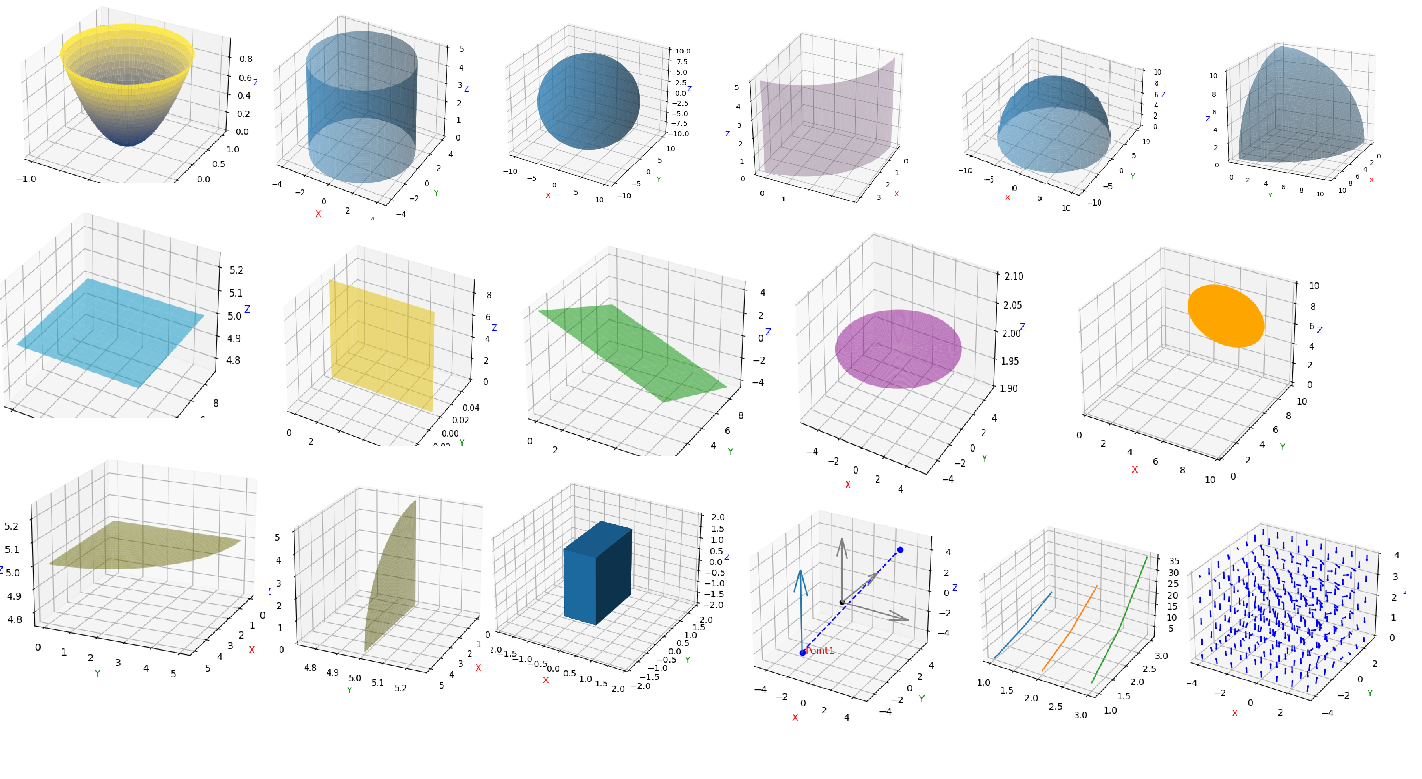

In [ ]:
"""
DONT RUN THIS!!! ONLY FOR REFERENCE

#FIGURE
fig = plt.figure()
fig = plt.figure(figsize=plt.figaspect(0.5))    # Set up a figure twice as wide as it is tall
plt.rcParams["figure.figsize"] = (10,8)

#AXES
ax = plt.figure().add_subplot(projection='3d')
ax = fig.add_subplot(111, projection='3d')      # Sets up a 1 x 1 grid of subplots and returns the first (and only) 
                                                # axis object in the grid. 

#The 3 numbers are: height, width, plot number. So, a 221 means 2 tall, 2 wide, plot number 1.
ax = fig.add_subplot(1, 2, 1, projection='3d')  # Set up the axes for the first plot,  size 1x2
ax = fig.add_subplot(1, 2, 2, projection='3d')  # Set up the axes for the second plot, size 1x2

ax.view_init(elev=35, azim=25, roll=0)          # View angles

ax.set_xlim(0, 40)                              # Limits of  x-scale
ax.set_ylim(0, 10)                              # Limits of  y-scale
ax.set_zlim(-1.01, 1.01)

ax.set_box_aspect(3)                            # box ratio y/x
ax.set_aspect('equal')                          # Set an equal aspect ratio y/x-scale

ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                          # To make Z fit into the picture (change the value)  

ax.set_zlabel("StackOverflow", rotation=90)     # Plot zlabel vertically
                    
# FIGURE SIZE
figure(figsize=(8, 6), dpi=80)                  # figure(figsize=(1,1)) would create an inch-by-inch image,..
# which would be 80-by-80 pixels unless you also give a different dpi argument.

#If you've already got the figure created, you can use figure.set_size_inches to adjust.. 
#the figure size
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100) 

#To propagate the size change to an existing GUI window, add forward=True:
fig.set_size_inches(18.5, 10.5, forward=True)

# There is also this workaround in case you want to change the size without using the figure..
#environment. So in case you are using plt.plot() for example, you can set a tuple with ..
#width and height:
plt.rcParams["figure.figsize"] = (20,3)



#--------------------
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=10)      # Separate color bar 
#-----------------------
#COLORS
color='deepskyblue' # gold, lime, fuchsia 
cmap=cm.cividis     # cm.coolwarm, cm.Greys


surf =ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)      # separate COLORBAR (surf is some plotted surface)

#PLOT
ax.plot_surface(X, Y, Z, color='y',alpha=0.5)  # alpha -> degree of opacity
ax.plot_surface(X, Y, Z, alpha=0.9, rstride=5, cstride=4, linewidth=0.5, cmap=cm.cividis) 
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)


#SHOW
plt.show()

#-----------------------------------------------------------------------------------------

#CONVENTIONS 
 Cartesian coordinates: X,Y,Z
 Polar coordinates:     R,P     R=rho=ϱ=radius,   P=phi=φ
 Spherical coordinates: R,T,P   R=rho=ρ=radius, T = Theta=ϴ=polar angle, P = Phi=φ=azimuthal angle 
 Common 2D coordinates: u,v

"""

To represent a surface you need exactly **two free variable parameters** suitable for the presented object. They may be two of Cartesian, Cylindrical or Spherical coordinates, or some other.
Two appropriate sets of numbers are created, one for each selected variables, with NumPy's <mark>numpy.arange(start, stop, step)</mark>. ( When using a non-integer step, such as 0.1, it is often better to use <mark>numpy.linspace(start, stop, num=..)</mark>. The arrays of numbers can be  combined  into a 2D network with the <mark> numpy.meshgrid()</mark> command.
Ultimately you must transform and calculate your **3D mesh coordinates in Cartesian X,Y,Z coordinates**. Then you are ready to use <mark>ax.plot_surface(X, Y, Z,...)</mark>  and <mark>plt.show</mark> to show what you've accomplished.

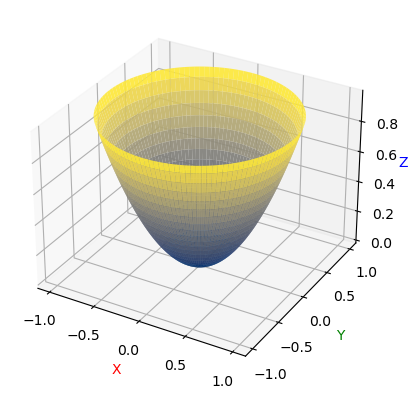

In [3]:
# PARABOLOID explained 

# Figure 
fig = plt.figure()                          # The top-level container for all plot elements.
ax = fig.add_subplot(111, projection='3d')  # This essentially sets up a 1 x 1 grid of subplots..
                                            # and returns the first (and only) axis object in the grid.
# Axis markings:
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                      # To make Z fit into the picture

# Surface
# Create a 2D mesh in polar coordinates. The radius R (=ρ) and the angle P (=φ) are the surface variable parameters.
R = np.arange(0, 1, 0.01)                   # Number set from 0 to 1  in 0.01 increments for the radius R
P = np.arange(0, 2*pi, 0.01)                # Number set from 0 to 2π in 0.01 increments for the angle P=phi=φ
R, P = np.meshgrid(R, P)                    # The 2D grid (R,P)=(ρ,φ)
# Express the mesh in the 3D Cartesian system, (X,Y,Z) = (X(R,P), Y(R,P), Z(R)):
X = R*np.cos(P)                               
Y = R*np.sin(P)
Z = R**2                                    

# Plot
ax.plot_surface(X, Y, Z,  alpha=0.9, rstride=5, cstride=4, linewidth=0.5, cmap=cm.cividis) 
# 'alpha'->degree of opacity; 'rstride' and 'cstride' controls the smoothing of rows in the surface plot; 'cmap' for colors                       

plt.show()


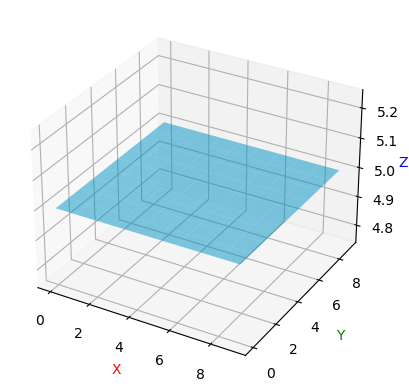

In [4]:
# HORIZONTAL PLANE

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')      #  "111" means "1x1 grid, first subplot"..
                                               # ("234" means "2x3 grid,  4th  subplot").
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                         # To make Z visible

# Surface
X, Y = np.meshgrid(range(10), range(10))       # (x,y) grid 10x10 (0,1,...,9) 
Z = np.ones_like(X)*5                          # z=5 in every grid point: 10x10 array of number 5 

# Plot 
ax.plot_surface(X, Y, Z, color='deepskyblue', alpha=0.5)     # alpha -> degree of opacity
plt.show()

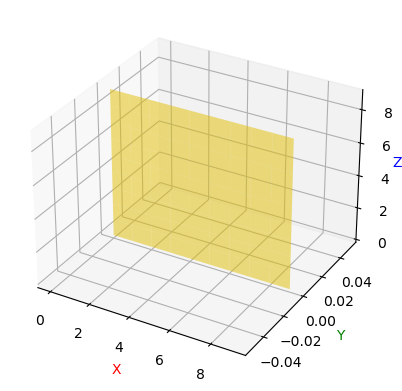

In [5]:
# VERTICAL PLANE 

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-4                         # To make Z fit into the picture

# Surface
X, Z = np.meshgrid(range(10), range(10))
Y = np.ones_like(X) * 0                      # y=0 in every grid point: 10x10 array of number 0 
 
# Plot 
ax.plot_surface(X, Y, Z, color='gold', alpha=0.5)
plt.show()

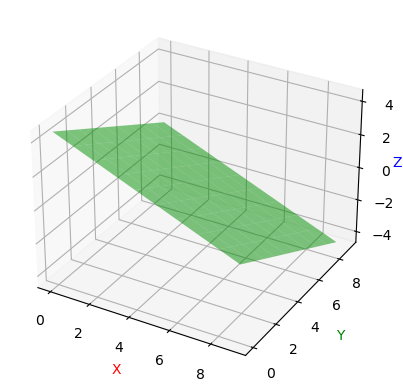

In [6]:
# OBLIQUE PLANE

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-4                                        # To make Z fit into the picture

# Surface
X, Y = np.meshgrid(range(10), range(10))                    # (x,y) grid 10x10 (0,1,...,9)
Z = (9 - X - Y) / 2           # Explicite function from a implicite plane function x +y + 2z = 9 

# Plot 
ax.plot_surface(X, Y, Z, alpha=0.5, color='lime')           # alpha -> degree of opacity 
plt.show()


C:\Users\miett\AppData\Local\Temp\ipykernel_5116\507149385.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


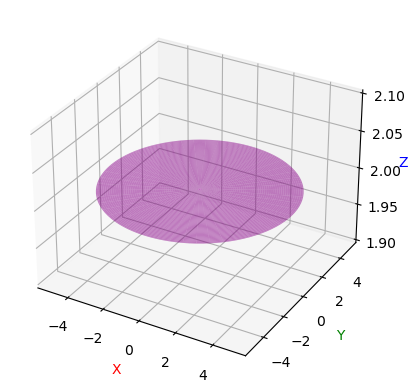

In [7]:
# SOLID CIRCLE

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                       # To make Z fit into the picture

# Surface (polar coordinates)
R = np.linspace(0, 5, 100)                   # Radius. 100 -> 100 samples 0,...,5
P = np.linspace(0,  2*np.pi, 100)            # Angle (P = phi = φ )

X = np.outer(R, np.cos(P))                   # x = rcos(φ)
Y = np.outer(R, np.sin(P))
Z = np.ones_like(X) * 2                      # The plate is at a height of 2 from the xy plane

# Plot
ax.plot_surface(X,Y,Z, color='fuchsia', alpha=0.5) #
fig.show()


In [8]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

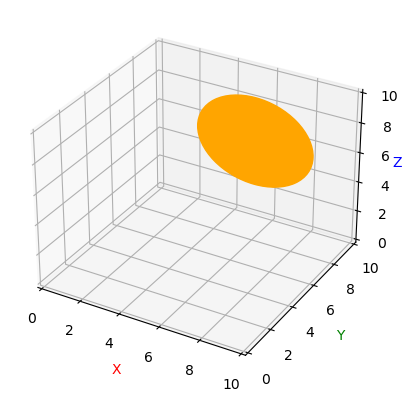

In [9]:
# CIRCLE ON THE 'WALL' 

# More input
from matplotlib.patches import Circle
import mpl_toolkits.mplot3d.art3d as art3d

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-4                         # To make Z fit into the picture
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)

# Surface (Circle on the 'wall')
p = Circle((5, 5), 3, color='orange')        # Circle 2D: (Center), radius
ax.add_patch(p)                              # New ax
art3d.pathpatch_2d_to_3d(p, z=10, zdir="y")  # zdir is direction perpendicular to the patch plane

# Plot
plt.show()

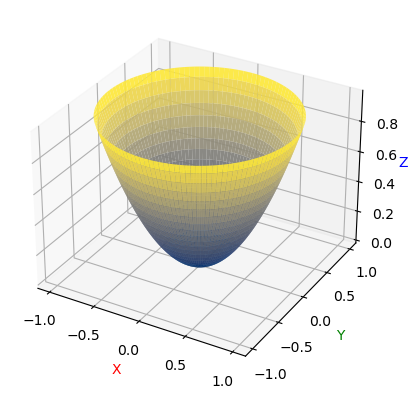

In [10]:
# PARABOLOID 

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                        # To make Z fit into the picture

# Surface
# Create the mesh in polar coordinates and compute corresponding Z.
R = np.arange(0, 1, 0.01)
P = np.arange(0, 2*pi, 0.01)                  # p,P <-> phi
R, P = np.meshgrid(R, P)
# Express the mesh in the cartesian system.
X = R*np.cos(P)    
Y = R*np.sin(P)
Z = R**2

# Plot
ax.plot_surface(X, Y, Z,  alpha=0.9, rstride=5, cstride=4, linewidth=0.5, cmap=cm.cividis) 
plt.show()


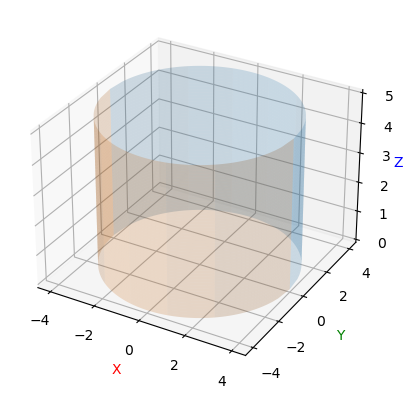

In [11]:
# CYLINDER 

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                         # To make Z fit into the picture

# Surface (cylinder in XYZ coordinates)
# The two variable parameters are X and Y
x = np.linspace(-4, 4, 100)
z = np.linspace( 0, 5, 500)
X, Z = np.meshgrid(x, z)
Y = np.sqrt(16-X**2)                           # Base circle: X^2 + Y^2 = 4^2

# Plot
ax.plot_surface(X,  Y, Z, alpha=0.2, rstride=10, cstride=20)
ax.plot_surface(X, -Y, Z, alpha=0.2, rstride=10, cstride=20)
plt.show()

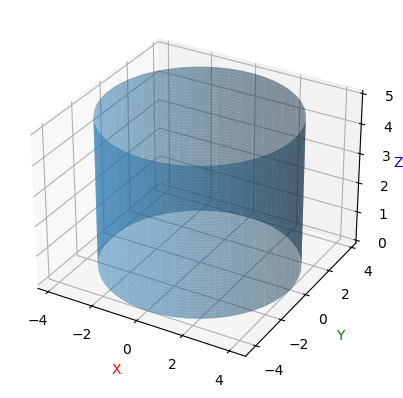

In [12]:
# CYLINDER 

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                                        # To make Z fit into the picture

# Surface
# Function that returns the  XYZ coordinates of points on the surface,
# variables for the surface are z and theta:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid                               # XYZ coordinates of the surface

Xc,Yc,Zc = data_for_cylinder_along_z(0.1, -0.2, 4, 5)         # Function call (cent-x,cent-y,rad,height-z)

# Plot
ax.plot_surface(Xc, Yc, Zc, alpha=0.5)
plt.show()

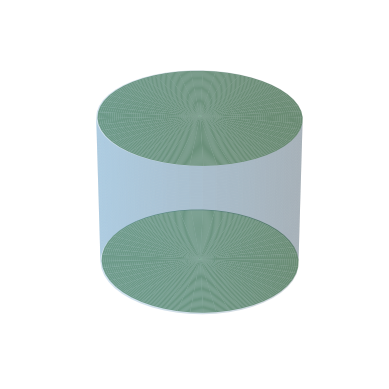

 r = 2, h = 3


In [13]:
# CYLINDER with Top and Bottom 

# Figure 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                                      # To make Z fit into the picture

#-----------------------------
# Cylinder Surface
# Function that returns the  XYZ coordinates of points on the surface,
# variables for the surface are z and theta:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid = np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid                             # XYZ coordinates of the surface

Xc,Yc,Zc = data_for_cylinder_along_z(0.1, -0.2, 2, 3)       # Function call (cent-x, cent-y, radius, height-z)

#-------------------------------
# Bottom surface (polar coordinates)
Rb = np.linspace(0, 2, 50)                                  # Radius = 2,  50 samples 0,...,2
Pb = np.linspace(0,  2*np.pi,50)                            # Angle (P = phi = φ )

Xb = np.outer(Rb, np.cos(Pb))                               # x = rcos(φ)
Yb = np.outer(Rb, np.sin(Pb))
Zb = np.ones_like(Xb) * -0.1                                # The plate is in the xy plane
#-------------------------------
# Top surface (polar coordinates)
Rt = np.linspace(0, 2, 50)                                  # Radius = 2,  50 samples 0,...,2
Pt = np.linspace(0,  2*np.pi,50)                            # Angle (P = phi = φ )

Xt = np.outer(Rt, np.cos(Pt))                               # x = rcos(φ)
Yt = np.outer(Rt, np.sin(Pt))
Zt = np.ones_like(Xt) * 2.89                                # The plate is at a height of 3 from the xy plane
#-------------------------------
# Point in the origin:
# ax.scatter(0, 0, 0, color='r')
#-------------------------------
# Plot
plt. axis( 'off' )                                          # Hide coordinate frame
ax.plot_surface(Xc, Yc, Zc, alpha=0.2)                      # Cylinder
ax.plot_surface(Xb,Yb,Zb, color='lightgreen', alpha=0.7)    # Bottom
ax.plot_surface(Xt,Yt,Zt, color='lightgreen', alpha=0.7)    # Top cap

plt.show()
print(' r = 2, h = 3')

<Figure size 640x480 with 0 Axes>

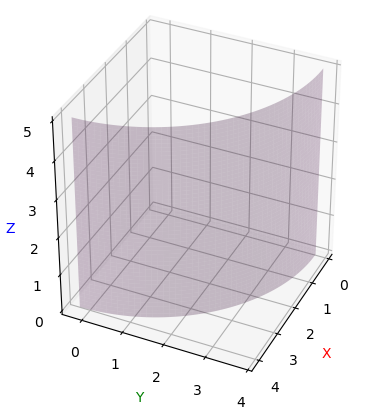

In [14]:
# CYLINDER_quarter 

# Figure
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=35, azim=25, roll=0)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=1.5                                 # To make Z fit into the picture
                       
# Surface
# Function that returns the  XYZ coordinates of points on the surface,
# variables for the surface are z and theta:
def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, np.pi/2, 50)               # Polar coordinate 
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x      
    y_grid = radius*np.sin(theta_grid) + center_y     
    return x_grid,y_grid,z_grid                       # XYZ coordinates of the surface

Xc,Yc,Zc = data_for_cylinder_along_z(0.1, -0.2, 4, 5) # Function call (cent-x,cent-y,rad,height-z)


# Plot
ax.plot_surface(Xc, Yc, Zc, alpha=0.3, color='violet')
ax.set_aspect('equal')

# saving the file.Make sure you use savefig() before show(). 
plt.savefig("cylind_quarter.png") 
plt.show()

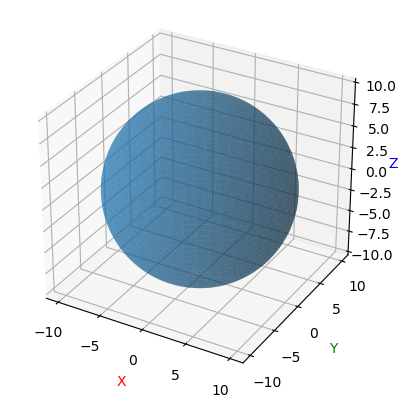

In [15]:
# SPHERE

import matplotlib.pyplot as plt
import numpy as np

# Figure 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                                 # To make Z fit into the picture

# Surface
# Spherical coordinates: Phi and Theta are variables, Rho is constant 10
P = np.linspace(0, 2 * np.pi, 100)                     # Azimuthal angle (P =  phi  = φ )
T = np.linspace(0, np.pi, 100)                         # Polar angle     (T = theta = ϴ) 
# Transform to XYZ coordinates
X = 10 * np.outer(np.cos(P), np.sin(T))                # x = rcos(φ)sin(ϴ)
Y = 10 * np.outer(np.sin(P), np.sin(T))
Z = 10 * np.outer(np.ones(np.size(P)), np.cos(T))

# Plot 
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_aspect('equal')
plt.show()

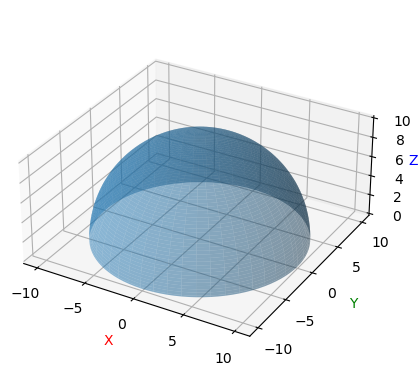

In [16]:
# 1/2-SPHERE

# Figure 
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                                    # To make Z fit into the picture

# Surface
# Spherical coordinates: Phi and Theta are variables, Rho is constant 10
P = np.linspace(0, 2 * np.pi, 100)                        # Phi
T = np.linspace(0, np.pi/2, 100)                          # Theta
# Transform to XYZ coordinates
X = 10 * np.outer(np.cos(P), np.sin(T))
Y = 10 * np.outer(np.sin(P), np.sin(T))
Z = 10 * np.outer(np.ones(np.size(P)), np.cos(T))

# Plot the surface
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_aspect('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

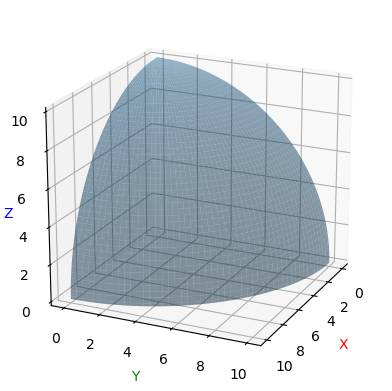

In [17]:
# 1/8-SPHERE

# Figure 
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=25, roll=0)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                               # To make Z fit into the picture

# Surface
# Spherical coordinates: Phi and Theta are variables, Rho is constant 10
P = np.linspace(0, np.pi/2, 100)                     # Phi
T = np.linspace(0, np.pi/2, 100)                     # Theta
# Transform to XYZ coordinates:
X = 10 * np.outer(np.cos(P), np.sin(T))
Y = 10 * np.outer(np.sin(P), np.sin(T))
Z = 10 * np.outer(np.ones(np.size(P)), np.cos(T))

# Plot
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_aspect('equal')
plt.show()

<Figure size 640x480 with 0 Axes>

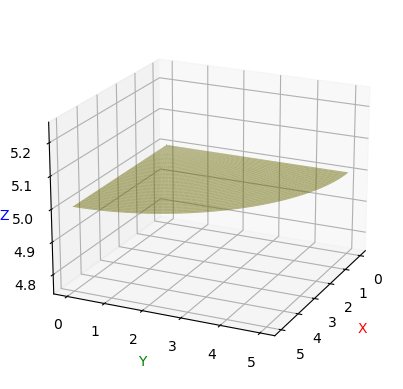

In [18]:
# 1/4-CIRCLE horizontal

# Figure 
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=25, roll=0)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                         # To make Z fit into the picture

# Surface 
h = 5
R = np.linspace(0, 5, 100)
P = np.linspace(0,  np.pi/2, 100)

X = np.outer(R, np.cos(P))
Y = np.outer(R, np.sin(P))
Z = h*np.ones_like(X) 

# Plot
ax.plot_surface(X, Y, Z, color= 'y', alpha=0.5)
plt.show()

<Figure size 640x480 with 0 Axes>

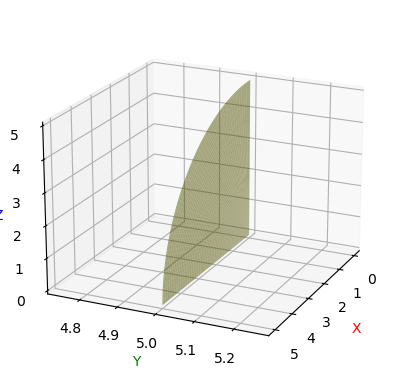

In [19]:
# 1/4-CIRCLE vertical

# Figure 
fig = plt.figure()
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=20, azim=25, roll=0)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                         # To make Z fit into the picture

# Surface 
h = 5
R = np.linspace(0, 5, 100)
P = np.linspace(0,  np.pi/2, 100)

X = np.outer(R, np.cos(P))
Z = np.outer(R, np.sin(P))
Y = h*np.ones_like(X) 

# Plot
ax.plot_surface(X, Y, Z, color= 'y', alpha=0.5)
plt.show()

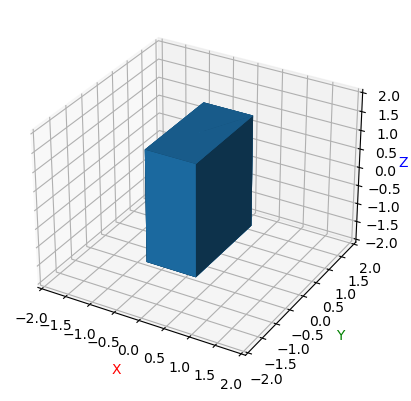

In [20]:
# CUBOID A
#(Original from ImportanceOfBeingErnest)
# To use a single call to plot_surface when drawing a cuboid one can parametrize the surface on two variables,
# e.g. using spherical coordinates.The following draws a cuboid with edgelengths a,b,c:

# Figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                         # To make Z fit into the picture

# Surface
def get_cube():   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)
    x = np.cos(Phi)*np.sin(Theta)
    y = np.sin(Phi)*np.sin(Theta)
    z = np.cos(Theta)/np.sqrt(2)
    return x,y,z

a = 1 
b = 2
c = 3
x,y,z = get_cube()

# Plot
ax.plot_surface(x*a, y*b, z*c)
plt.show()


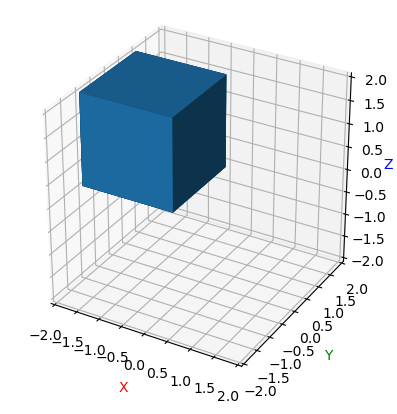

In [21]:
# CUBOID B
#(from ImportanceOfBeingErnest)
# To use a single call to plot_surface when drawing a cuboid one can parametrize the surface on two variables,
# e.g. using spherical coordinates.The following draws a cuboid with edgelengths a,b,c: 

# Figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                          # To make Z fit into the picture
ax.set_aspect('equal')                          # Set an equal aspect ratio y/x-scale

# Surface
def get_cube(a,b,c):   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)
    x = a*np.cos(Phi)*np.sin(Theta)
    y = b*np.sin(Phi)*np.sin(Theta)
    z = c*np.cos(Theta)/np.sqrt(2)
    return x,y,z

x,y,z = get_cube(2,2,2)     # (a,b,c)

# Plot
ax.plot_surface(x-1, y, z+1)
plt.show()


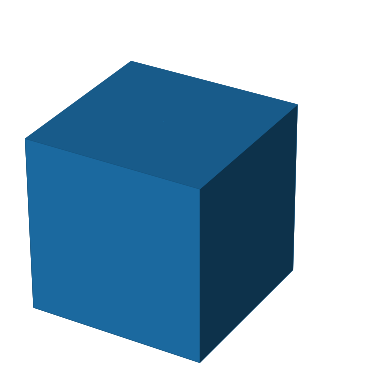

In [22]:
# CUBOID B copy
#(from ImportanceOfBeingErnest)
# To use a single call to plot_surface when drawing a cuboid one can parametrize the surface on two variables,
# e.g. using spherical coordinates.The following draws a cuboid with edgelengths a,b,c: 

# Figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,1)
ax.set_ylim(1,0)
ax.set_zlim(0,1)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                          # To make Z fit into the picture
ax.set_aspect('equal')                          # Set an equal aspect ratio y/x-scale

# Surface
def get_cube(a,b,c):   
    phi = np.arange(1,10,2)*np.pi/4
    Phi, Theta = np.meshgrid(phi, phi)
    x = a*np.cos(Phi)*np.sin(Theta)
    y = b*np.sin(Phi)*np.sin(Theta)
    z = c*np.cos(Theta)/np.sqrt(2)
    return x,y,z

x,y,z = get_cube(1,1,1)     # (a,b,c)

# Plot
plt. axis( 'off' )
ax.plot_surface(x, y, z)  # Moves the cube 
plt.show()


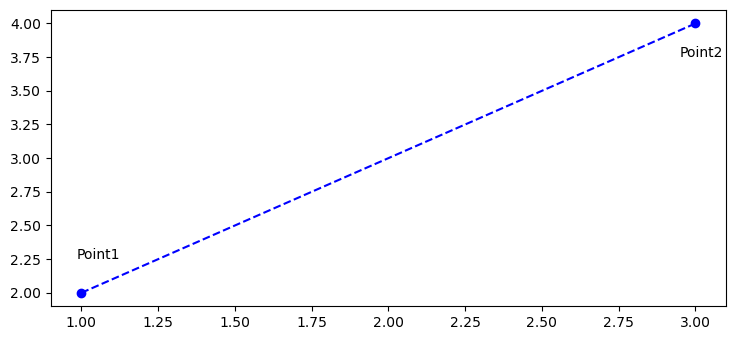

In [23]:
# LINE SEGMENT 2D
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
point1 = [1, 2]
point2 = [3, 4]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, 'bo', linestyle="--")
plt.text(point1[0]-0.015, point1[1]+0.25, "Point1")
plt.text(point2[0]-0.050, point2[1]-0.25, "Point2")
plt.show()

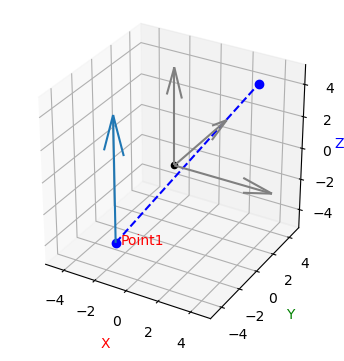

In [24]:
# LINE SEGMENT 2D

# Figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3                          # To make Z fit into the picture
ax.set_aspect('equal')                       

# Black point in the origin
ax.scatter(0, 0, 0, color='k')

# Dotted blue line 
point1 = [-2, -3, -4]
point2 = [3, 4, 4]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
z_values = [point1[2], point2[2]]
plt.plot(x_values, y_values, z_values, 'bo', linestyle="--")
ax.text(-1.7, -3, -4, "Point1", color='red')

# Quiver vertical
ax.quiver(-2, -3, -4, 0, 0, 1, length=8, linestyle="-")

# Coordinate system
# cols = ['r', 'g', 'b']
quivers = ax.quiver([0,0,0],[0,0,0],[0,0,0],[6,0,0],[0,6,0],[0,0,6], colors='gray')             # colors=cols)

plt.show()

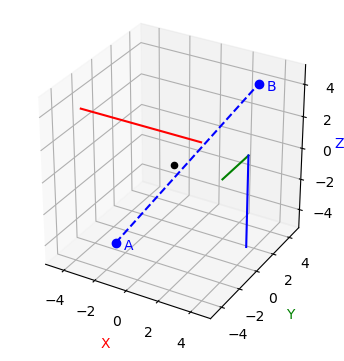

In [25]:
# LINE SEGMENT 3D 

# Figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3                          # To make Z fit into the picture
ax.set_aspect('equal')                       

# VERTICAL LINES
# Line X direction
x = [0 ,0 ,0 ,0 ,-8] 
y = [3 ,3 ,3 ,3 ,3 ]   
z = [3, 3, 3, 3, 3 ]
plt.plot(x, y, color=('r')) 

# Line Y-direction
x = [3 ,3 ,3 ,3 ,3 ]
y= [0 ,0 ,0 ,0 ,3 ]    
plt.plot(x, y, color=('g')) 

# Line Z-direction
x = [3 ,3 ,3 ,3 ,3 ]
y = [3 ,3 ,3 ,3 ,3 ] 
z = [0 ,0 ,0 ,0 ,-6 ]
plt.plot(x, y, z, color=('b')) 

# Dotted oblique blue line with endpoints
point1 = [-2, -3, -4]
point2 = [3, 4, 4]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
z_values = [point1[2], point2[2]]
plt.plot(x_values, y_values, z_values, 'bo', linestyle="--")
ax.text(-1.5, -3, -4.3, "A", color='b')
ax.text(3.5, 4, 3.7, "B", color='b')

# Point in the origin:
ax.scatter(0, 0, 0, color='k')


plt.show()

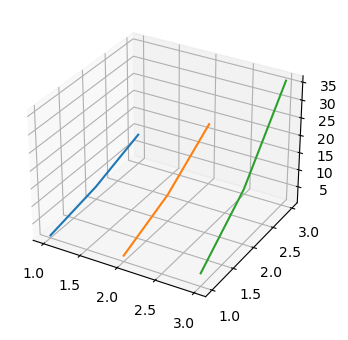

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Create numpy arrays
xs = np.array([1,1,1,2,2,2,3,3,3])
ys = np.array([1,2,3,1,2,3,1,2,3])
zs = np.array([1,4,9,2,8,18,4,16,36])

# Create Figure and 3D Axes
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Iterate over unique values in xs array
for unique_x in np.unique(xs):
    # Slice arrays and plot
    xvals = xs[np.where(xs == unique_x)]
    yvals = ys[np.where(xs == unique_x)]
    zvals = zs[np.where(xs == unique_x)]
    ax.plot3D(xvals, yvals, zvals)


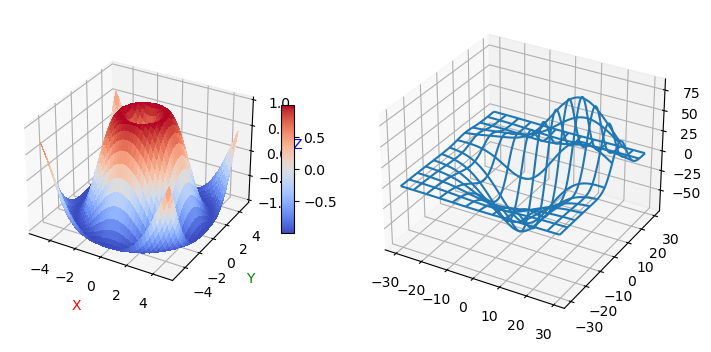

In [27]:
# MATPLOTLIB EXAMPLE

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from mpl_toolkits.mplot3d.axes3d import get_test_data

# Figure 
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# # Surface First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                         # To make Z fit into the picture

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.zaxis.labelpad=-0.4                        # To make Z fit into the picture

fig.colorbar(surf, shrink=0.4, aspect=10)

# ==============
# # Surface Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

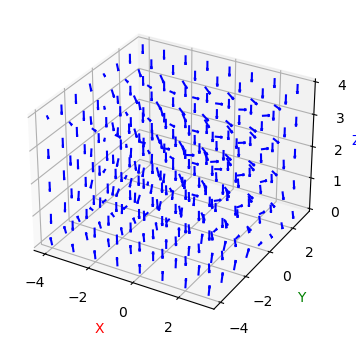

In [28]:
# VECTOR FIELD

# Figure 
ax = plt.figure().add_subplot(projection='3d')

# Surface
# Make the grid
x, y, z = np.meshgrid(np.arange(-4, 4, 1),
                      np.arange(-4, 4, 1),
                      np.arange( 0, 5, 1))
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                         # To make Z fit into the picture

# Make the direction data for the arrows
u = z
v = x
w = -3*y**2**z

ax.quiver(x, y, z, u, v, w, color='b',length=0.3, normalize=True)

plt.show()